###Marketing Campaign Performance Analysis Report

In [ ]:
#Load data
%pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# choosing color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [29]:
# Load the dataset
import pandas as pd

data = pd.read_csv(r'C:\Users\doyib\OneDrive\Desktop\PORTFOLIO\Marketing\marketing_campaign_dataset.csv')
print(data.head())

   Campaign_ID              Company Campaign_Type Target_Audience Age  Group  \
0            1  Innovate Industries         Email             Men      18-24   
1            2       NexGen Systems         Email           Women      35-44   
2            3    Alpha Innovations    Influencer             Men      25-34   
3            4   DataTech Solutions       Display        All Ages     18 -44   
4            5       NexGen Systems         Email             Men      25-34   

  Duration Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  \
0  30 days   Google Ads             0.04      $16,174.00   6.29      Chicago   
1  60 days   Google Ads             0.12      $11,566.00   5.61     New York   
2  30 days      YouTube             0.07      $10,200.00   7.18  Los Angeles   
3  60 days      YouTube             0.11      $12,724.00   5.55        Miami   
4  15 days      YouTube             0.05      $16,452.00   6.50  Los Angeles   

   Language  Clicks  Impressions  Enga

###Exploratory Data Analysis

##Data Overview

In [8]:
data.shape 

(200000, 17)

The dataset has 200000 and 17 columns, which include customer demographics, marketing campaign details, and purchase history.

In [9]:
# check basic dataset info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Age  Group        200000 non-null  object 
 5   Duration          200000 non-null  object 
 6   Channel_Used      200000 non-null  object 
 7   Conversion_Rate   200000 non-null  float64
 8   Acquisition_Cost  200000 non-null  object 
 9   ROI               200000 non-null  float64
 10  Location          200000 non-null  object 
 11  Language          200000 non-null  object 
 12  Clicks            200000 non-null  int64  
 13  Impressions       200000 non-null  int64  
 14  Engagement_Score  200000 non-null  int64  
 15  Customer_Segment  200000 non-null  object 
 16  Date              20

There are no null values represented in there. 

In [10]:
# check for duplicates
data = data.duplicated().sum()
print(int(data))

0


There are no duplicate values. 

In [ ]:
###ANALYSIS

# Reload the dataset because 'data' was overwritten as a scalar earlier
data = pd.read_csv(r'C:\Users\doyib\OneDrive\Desktop\PORTFOLIO\Marketing\marketing_campaign_dataset.csv')

# Clean and convert 'Acquisition_Cost' to numeric
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Engineering the estimated revenue column to find ROI
data['Estimated_Revenue'] = data['Acquisition_Cost'] * (1 + data['ROI'])
print(data['Estimated_Revenue'].head())

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\doyib\AppData\Local\Temp\ipykernel_14560\1036004774.py:7: SyntaxWarning: invalid escape sequence '\$'
  data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)


0    117908.46
1     76451.26
2     83436.00
3     83342.20
4    123390.00
Name: Estimated_Revenue, dtype: float64


In [ ]:
# Ensure 'Acquisition_Cost' is numeric
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Create 'Estimated_Revenue' column if it doesn't exist
if 'Estimated_Revenue' not in data.columns:
	data['Estimated_Revenue'] = data['Acquisition_Cost'] * (1 + data['ROI'])

# Find total estimated revenue
total_estimated_revenue = data['Estimated_Revenue'].sum()
print(f'Total Estimated Revenue: ${total_estimated_revenue:,.2f}')

# Find the total acquisition cost
total_acquisition_cost = data['Acquisition_Cost'].sum()
print(f'Total Acquisition Cost: ${total_acquisition_cost:,.2f}')

# Calculate ROI
total_roi = (total_estimated_revenue - total_acquisition_cost) / total_acquisition_cost
print(f'ROI: {roi:.2%}')

# Marketing Campaign Duration
data['Date'] = pd.to_datetime(data['Date'])
campaign_start = data['Date'].min()
print(f"Marketing Campaign Start Date: {campaign_start.strftime('%Y-%m-%d')}")
campaign_end = data['Date'].max()
print(f"Marketing Campaign End Date: {campaign_end.strftime('%Y-%m-%d')}")
print(f"Marketing Campaign Duration: {(campaign_end - campaign_start).days} days")



Total Estimated Revenue: $15,018,267,282.24
Total Acquisition Cost: $2,500,878,608.00
ROI: 500.52%
Marketing Campaign Start Date: 2021-01-01
Marketing Campaign End Date: 2021-12-31
Marketing Campaign Duration: 364 days


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\doyib\AppData\Local\Temp\ipykernel_14560\4739898.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)


Over the period of 364 day, the firm spend a whooping $2,500,878,608.00 and earned a mouth-watering $15,018,267,282.24, resulting in 501% in ROI.

Average Conversion Rate: 8.01%
Average Engagement Score: 5.49
Average Acquisition Cost: $12,504.39
Average Estimated Revenue: $75,091.34
Average ROI: 500.24%
Number of Comapies:5


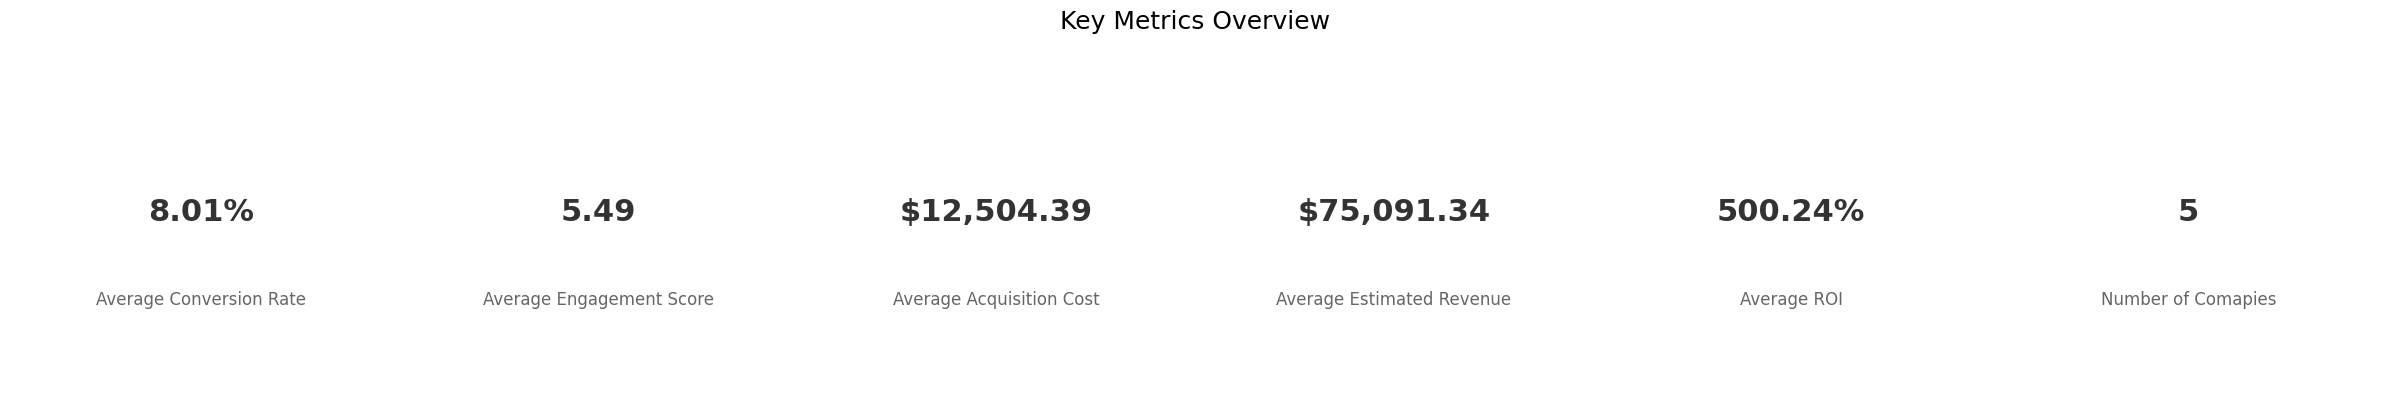

In [ ]:
#avg conversion rate
avg_conversion_rate = data['Conversion_Rate'].mean()
print(f'Average Conversion Rate: {avg_conversion_rate:.2%}')

#avg engagement score
avg_engagement_score = data['Engagement_Score'].mean()
print(f'Average Engagement Score: {avg_engagement_score:.2f}')

#avg acquisition cost
avg_acquisition_cost = data['Acquisition_Cost'].mean()
print(f'Average Acquisition Cost: ${avg_acquisition_cost:,.2f}')

#avg estimated revenue
avg_estimated_revenue = data['Estimated_Revenue'].mean()    
print(f'Average Estimated Revenue: ${avg_estimated_revenue:,.2f}')

#avg ROI
avg_roi = data['ROI'].mean()
print(f'Average ROI: {avg_roi:.2%}')

#numner of companies
noc= data['Company'].nunique()
print(f'Number of Comapies:{noc}')

#Visualisation of Average Conversion Rate, Average Engagement Score, Average Estimated Revenue, Average ROI as cards
import matplotlib.pyplot as plt

# Prepare metrics using the actual variables
metrics = {
    'Average Conversion Rate': f"{avg_conversion_rate:.2%}",
    'Average Engagement Score': f"{avg_engagement_score:.2f}",
    'Average Acquisition Cost': f"${avg_acquisition_cost:,.2f}",
    'Average Estimated Revenue': f"${avg_estimated_revenue:,.2f}",
    'Average ROI': f"{avg_roi:.2%}",
    'Number of Comapies': f"{noc}"
}

def plot_cards(metrics, title="Key Metrics Overview"):
    fig, axs = plt.subplots(1, len(metrics), figsize=(4 * len(metrics), 4))
    fig.suptitle(title, fontsize=18)
    
    # If only one metric, axs is not iterable
    if len(metrics) == 1:
        axs = [axs]
    
    for ax, (metric_name, value) in zip(axs, metrics.items()):
        ax.set_facecolor('white')
        ax.text(0.5, 0.6, f"{value}", ha='center', va='center', fontsize=22, weight='bold', color='#333333')
        ax.text(0.5, 0.3, metric_name, ha='center', va='center', fontsize=12, color='#666666')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

# Example usage
plot_cards(metrics, title="Key Metrics Overview")

Lets find out about the top 7 questions that matter to CEOs.

1. Which marketing channels generated the hightest ROI

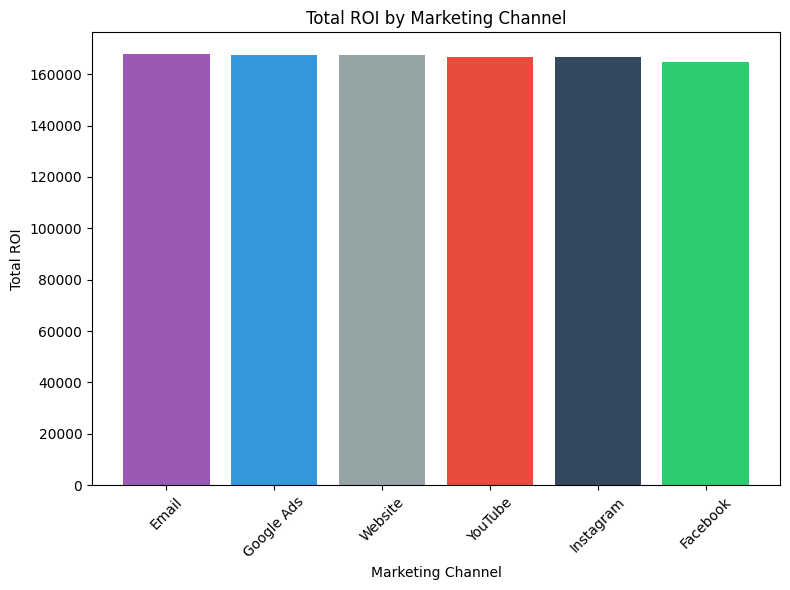

In [42]:
# Visualize ROI by marketing channel using the existing channel_roi dataframe

# Sort the channels by ROI in descending order
channel_roi = channel_roi.sort_values(by='ROI', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(channel_roi['Channel_Used'], channel_roi['ROI'], color=flatui)
plt.title('Total ROI by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Total ROI')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

There's a fairly good distribution across the channels used. It's best to continue using these channels since there isnt signififcant differences between them in terms of ROI

Whats the coversion rate by campaign type

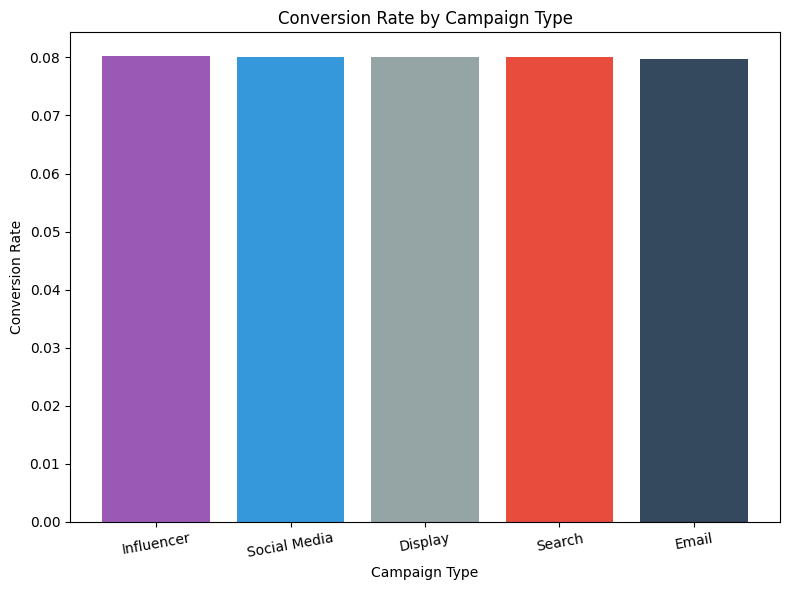

In [46]:
#Whats the coversion rate by campaign type
# Calculate conversion rate by campaign type
conversion_rate = data.groupby('Campaign_Type')['Conversion_Rate'].mean().reset_index() 
conversion_rate = conversion_rate.sort_values(by='Conversion_Rate', ascending=False)

# Visualize conversion rate by campaign type
plt.figure(figsize=(8, 6))  
plt.bar(conversion_rate['Campaign_Type'], conversion_rate['Conversion_Rate'], color=flatui)
plt.title('Conversion Rate by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=10)
plt.tight_layout()  
plt.show()

MMM

Which cities generated most revenue 

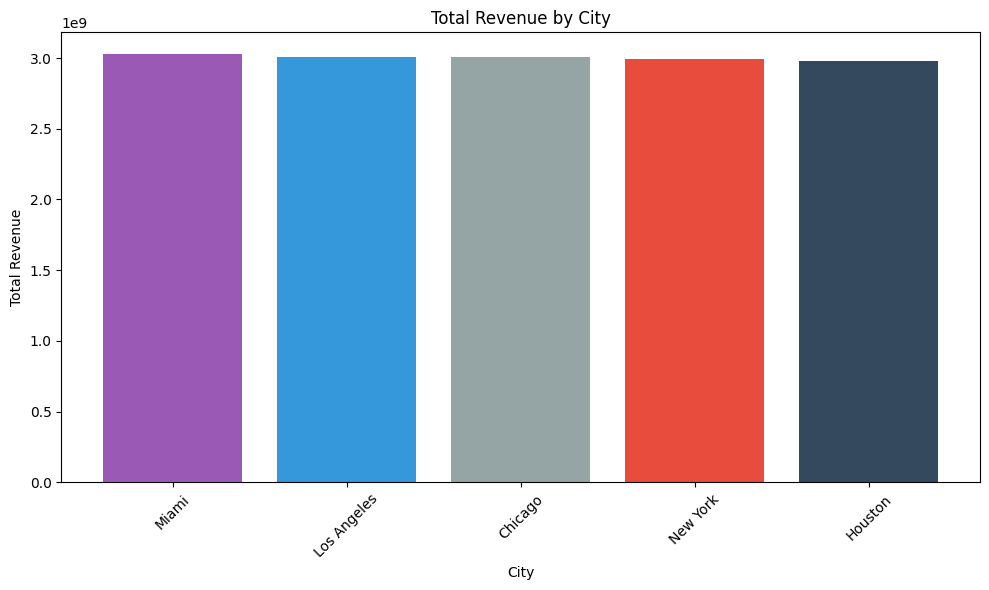

In [49]:
#Which cities generated most revenue 
# Calculate total revenue by location (city)
city_revenue = data.groupby('Location')['Estimated_Revenue'].sum().reset_index()

# Sort the cities by total revenue in descending order
city_revenue = city_revenue.sort_values(by='Estimated_Revenue', ascending=False)

# Visualize total revenue by location
plt.figure(figsize=(10, 6)) 
plt.bar(city_revenue['Location'], city_revenue['Estimated_Revenue'], color=flatui)
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Though Miami generated the most revenue, it is fairly the same across the other locations with little differences.

Which languages yields the most engagement score

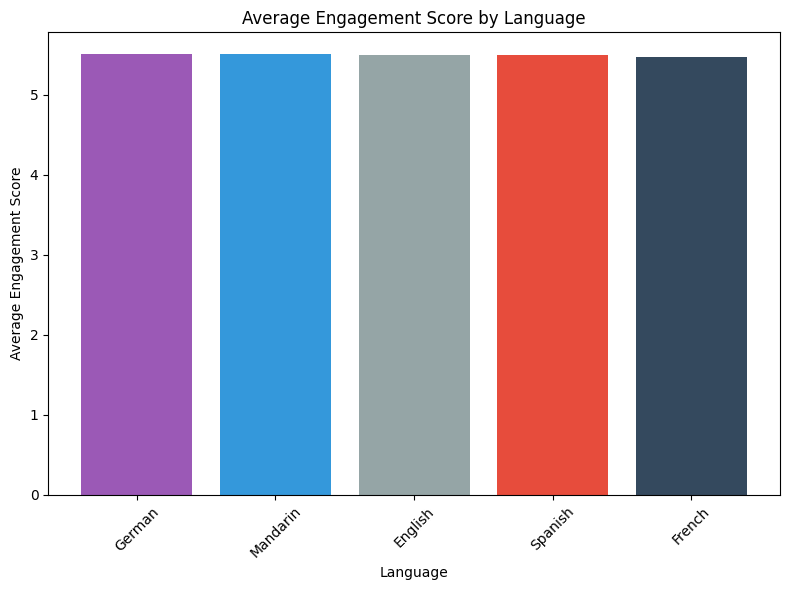

In [50]:
#Which languages yields the most engagement score
# Calculate average engagement score by language
language_engagement = data.groupby('Language')['Engagement_Score'].mean().reset_index()

# Sort the languages by average engagement score in descending order
language_engagement = language_engagement.sort_values(by='Engagement_Score', ascending=False)

# Visualize average engagement score by language
plt.figure(figsize=(8, 6))
plt.bar(language_engagement['Language'], language_engagement['Engagement_Score'], color=flatui)
plt.title('Average Engagement Score by Language')
plt.xlabel('Language')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


All Languages had 5-star ratings averagely...

What is the cost per conversion across campaigns


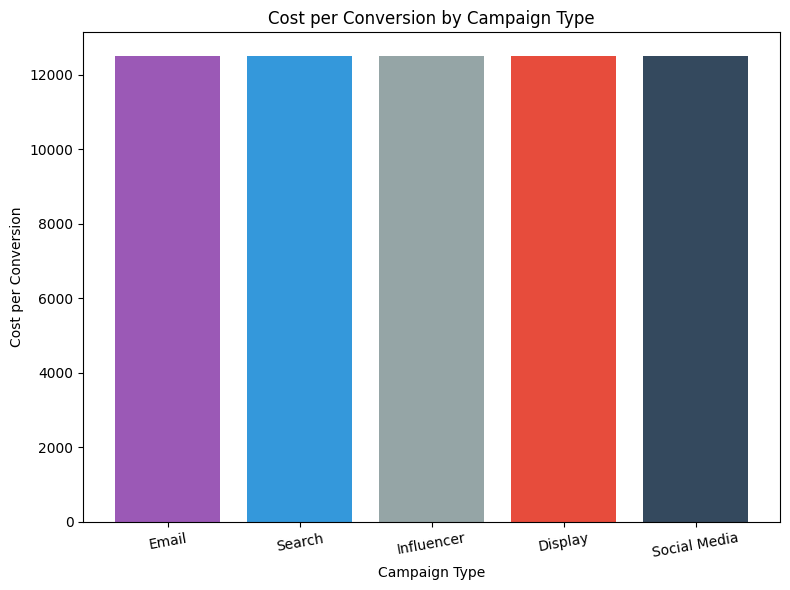

In [52]:
#What is the cost per conversion across campaigns
# Calculate cost per conversion by campaign type
cost_per_conversion = data.groupby('Campaign_Type')['Acquisition_Cost'].mean().reset_index()

# Sort the campaign types by cost per conversion in ascending order
cost_per_conversion = cost_per_conversion.sort_values(by='Acquisition_Cost', ascending=True)

# Visualize cost per conversion by campaign type
plt.figure(figsize=(8, 6))
plt.bar(cost_per_conversion['Campaign_Type'], cost_per_conversion['Acquisition_Cost'], color=flatui)
plt.title('Cost per Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Cost per Conversion')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

Similar cost across campaign types

Which campaign is underperforming and should be stopped?

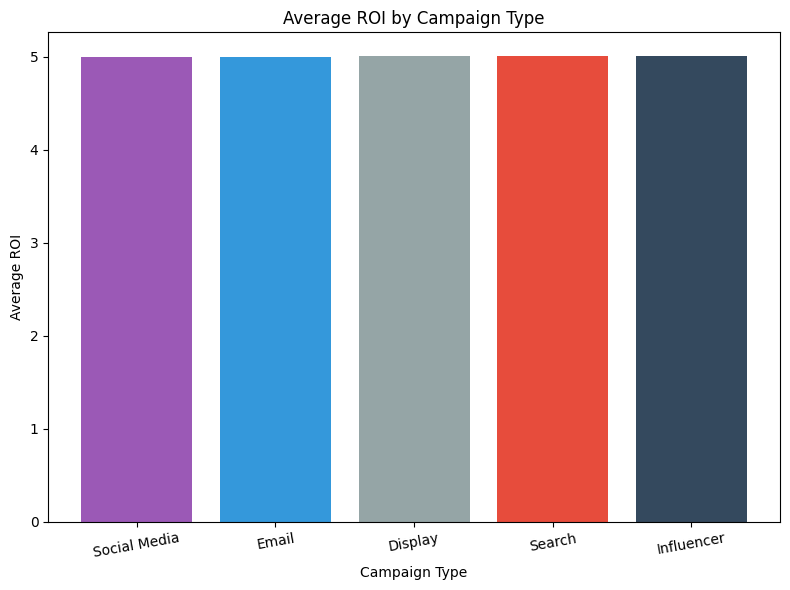

In [53]:
#Which campaign is underperforming and should be stopped
# Calculate average ROI by campaign type
campaign_roi = data.groupby('Campaign_Type')['ROI'].mean().reset_index()

# Sort the campaign types by ROI in ascending order
campaign_roi = campaign_roi.sort_values(by='ROI', ascending=True)

# Visualize average ROI by campaign type
plt.figure(figsize=(8, 6))
plt.bar(campaign_roi['Campaign_Type'], campaign_roi['ROI'], color=flatui)
plt.title('Average ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average ROI')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


All are performing greatly

Which comapany generated most revenue


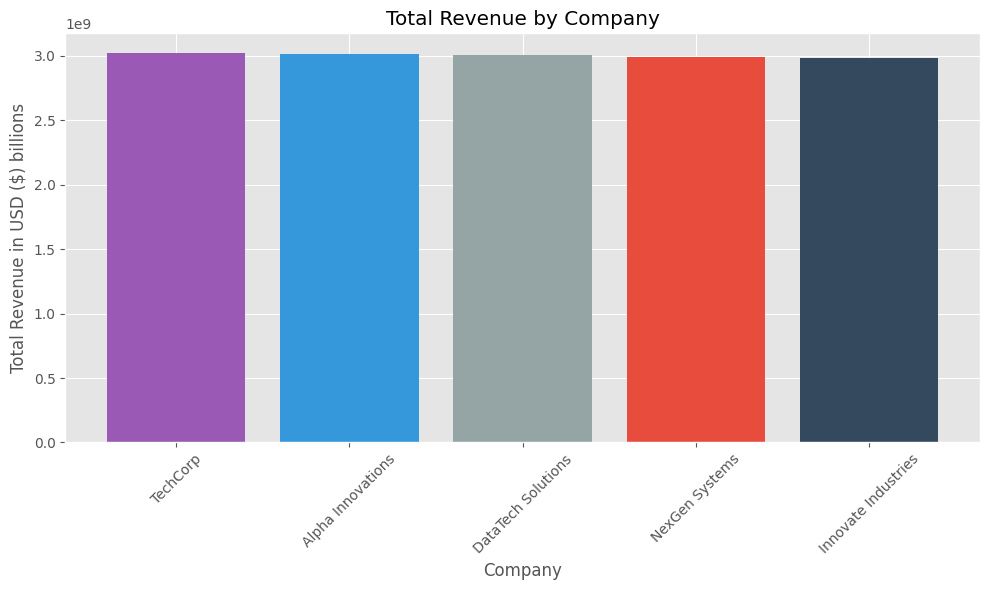

In [78]:
#Which comapany generated most revenue
# Calculate total revenue by company
company_revenue = data.groupby('Company')['Estimated_Revenue'].sum().reset_index()

# Sort the companies by total revenue in descending order
company_revenue = company_revenue.sort_values(by='Estimated_Revenue', ascending=False)

# Visualize total revenue by company
plt.figure(figsize=(10, 6))
plt.bar(company_revenue['Company'], company_revenue['Estimated_Revenue'], color=flatui)
plt.title('Total Revenue by Company')
plt.xlabel('Company')
plt.ylabel('Total Revenue in USD ($) billions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A clear revenue leader among participating companies was identified; TechCorp. This could signal stronger market presence or a more efficient sales funnel.

Conclusions
The marketing campaign has been highly successful, with a 501% ROI. Most performance metrics show consistency across campaign types, languages, and regions.


Recommendations
Maintain current marketing channels—they are all performing consistently.
Prioritize high-conversion campaign types in future efforts.
Further analyze top-performing cities and companies to understand success factors.
Continue using multilingual strategies, as engagement remains strong across the board.